In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('gurgaon_properties_post_feature_selection.csv')

In [3]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,1.0,1.0,0.82
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,0.0,0.0,1.0,2.0,0.95
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,1.0,0.0,0.32
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,1.0,0.0,1.0,0.0,2.0,1.60
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,1.0,0.0,0.0,2.0,0.48


In [4]:
#we'll apply linear regression on this data
#befre that, we'll apply OHE on categrical cols which are currently Ordinally encoded
#perform standard scaling bcoz columns have values in different scale 
#price col is right skewed, we'll apply log transformation so it will be somewhat normally distributed

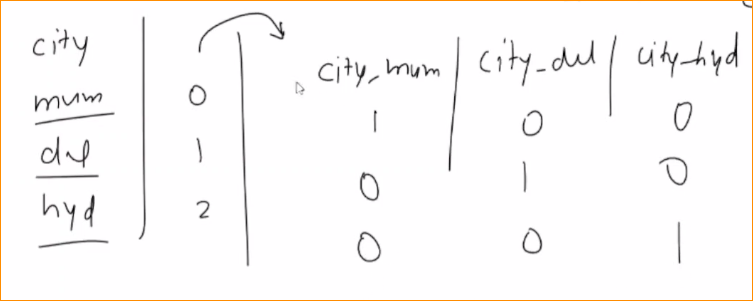

In [5]:
#sector, balcony, agepossesion, furnishing type, luxury category, floor category

In [6]:
X = df.drop(columns=['price'])
y = df['price']

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

In [8]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

In [9]:
# Applying the log1p transformation to the target variable
y_transformed = np.log1p(y)

In [10]:
#column transformer video link
# https://www.youtube.com/watch?v=5TVj6iEBR4I

In [11]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ], 
    remainder='passthrough'
)

In [12]:
# pipelines video link
# https://www.youtube.com/watch?v=xOccYkgRV4Q

In [16]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [17]:
# K-fold cross-validation with pipeline
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [18]:
scores.mean()

0.8558124194969945

In [19]:
scores.std()

0.015558627307879462

In [20]:
#r2 score was very good considering its a baseline model
#it will improve after we check other algorithms, hyper parameter tuning,further changes in data etc
#ever std is also very low, which means results are consistent

### since its a predictive model, so including r2 score, mean absolute error should also be good¶

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [22]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', LinearRegression())])

In [23]:
y_pred = pipeline.predict(X_test)

In [24]:
y_pred = np.expm1(y_pred)

In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.6483881109416978

In [26]:
#its coming out to be 0.64cr.. which means our model is doing a mistake of 64lakhs in every prediction
#we need to improve this

### lets now try svm algorithm

In [27]:
# Creating a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf'))
])

In [28]:
# K-fold cross-validation with pipeline
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

In [29]:
scores.mean()

0.8845360715052786

In [30]:
scores.std()

0.014784881452420046

In [31]:
#score has incresed usnig basic svm with advanced rbf kernel & also std reduced

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [33]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [34]:
y_pred = pipeline.predict(X_test)

In [35]:
y_pred = np.expm1(y_pred)

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(np.expm1(y_test),y_pred)

0.5324591082613233

In [38]:
#MAE also reduced to 53lakhs 

### what all can change to improve r2 score

In [39]:
# try different algorithms
# hyper parameter tuning
# perform feature engineering
# bring more data